## Home and away wins of the selected Premier League teams

1. Added the columns **team_name, common_name, season, wins, draws and losses** to the new DataFrame

2. Selected the following teams in the dataframe **(common_name): 'Arsenal', 'Tottenham Hotspur', 'Manchester City', 'Manchester United', 'Chelsea', 'Liverpool', 'Everton'**

3. Shorten team names for the graph by creating a new column **short_name**

4. Added new column **points** with the formula
>*'wins'* * *3* + *'draws'*


- Visualization provides a clear overview of how different teams are performing in terms of points in the English Football League & insights into team standings.

In [66]:
import pandas as pd

url = 'https://raw.githubusercontent.com/WiljamiT/data-visualization/main/csv/england-premier-league-teams-2018-to-2019-stats.csv'  # Replace 'url_of_the_data.csv' with the actual URL

df = pd.read_csv(url)

new_df = pd.DataFrame()

new_df['team_name'] = df['team_name']

new_df['common_name'] = df['common_name']

new_df['season'] = df['season']

new_df['wins'] = df['wins']

new_df['draws'] = df['draws']

new_df['losses'] = df['losses']

new_df.head()

selected_teams = ['Arsenal', 'Tottenham Hotspur', 'Manchester City', 'Manchester United', 'Chelsea', 'Liverpool', 'Everton']

df_selected = new_df[df['common_name'].isin(selected_teams)].copy()

short_names = {'Arsenal': 'Arsenal', 'Tottenham Hotspur': 'Tottenham', 'Manchester City': 'ManCity',
               'Manchester United': 'ManU', 'Chelsea': 'Chelsea', 'Liverpool': 'Liverpool', 'Everton': 'Everton'}

df_selected.loc[:, 'short_name'] = df_selected['common_name'].map(short_names)

df_selected.loc[:, 'points'] = df_selected['wins'] * 3 + df_selected['draws']

df_selected.head()


,team_name,common_name,season,wins,draws,losses,short_name,points
0,Arsenal FC,Arsenal,2018/2019,21,7,10,Arsenal,70
1,Tottenham Hotspur FC,Tottenham Hotspur,2018/2019,23,2,13,Tottenham,71
2,Manchester City FC,Manchester City,2018/2019,32,2,4,ManCity,98
5,Everton FC,Everton,2018/2019,15,9,14,Everton,54
9,Manchester United FC,Manchester United,2018/2019,19,9,10,ManU,66


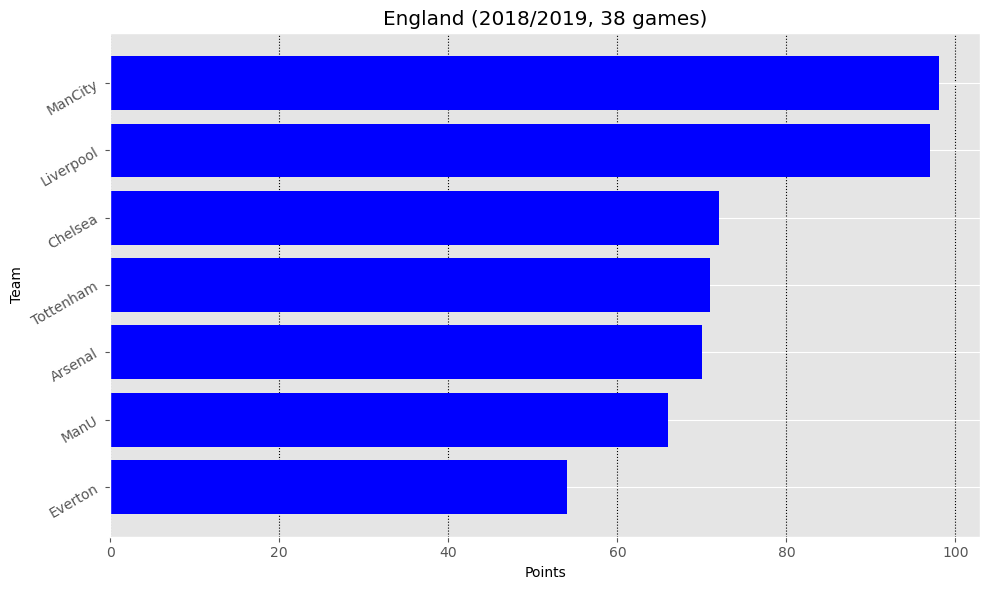

In [67]:
import matplotlib.pyplot as plt

df_selected_sorted = df_selected.sort_values(by='points')

plt.style.use('ggplot')

plt.figure(figsize=(10, 6))
plt.barh(df_selected_sorted['short_name'], df_selected_sorted['points'], color='blue')

plt.yticks(rotation=30)

plt.xlabel('Points')
plt.ylabel('Team')
plt.title(f"England ({season}, {matches_played} games)")

plt.grid(True, axis='x', linestyle=':', color='black')

plt.tight_layout()
plt.show()